# Problem 1.1 Supervised Learning

In [54]:
!pip install ucimlrepo

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ucimlrepo import fetch_ucirepo 

In [56]:
# Load the dataset
df = pd.read_csv('airbnb.csv')

# Display the first few rows
print(df.head())

   Unnamed: 0  listing_id                                               name  \
0           0    13740704  Cozy,budget friendly, cable inc, private entra...   
1           1    22005115              Two floor apartment near Central Park   
2           2    21667615                  Beautiful 1BR in Brooklyn Heights   
3           3     6425850                          Spacious, charming studio   
4           4    22986519              Bedroom on the lively Lower East Side   

     host_id host_name          neighbourhood_full            coordinates  \
0   20583125    Michel         Brooklyn, Flatlands  (40.63222, -73.93398)   
1   82746113   Cecilia  Manhattan, Upper West Side  (40.78761, -73.96862)   
2      78251    Leslie  Brooklyn, Brooklyn Heights   (40.7007, -73.99517)   
3   32715865    Yelena  Manhattan, Upper West Side  (40.79169, -73.97498)   
4  154262349    Brooke  Manhattan, Lower East Side  (40.71884, -73.98354)   

         room_type price  number_of_reviews last_review 

## Data Cleaning

In [57]:
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [58]:
# Get summary statistics
print(df.describe())

         Unnamed: 0    listing_id       host_id  number_of_reviews  \
count  10019.000000  1.001900e+04  1.001900e+04       10019.000000   
mean    5009.000000  1.927634e+07  6.795923e+07          22.459727   
std     2892.380507  1.095056e+07  7.863106e+07          43.173896   
min        0.000000  3.831000e+03  2.787000e+03           0.000000   
25%     2504.500000  9.674772e+06  7.910880e+06           1.000000   
50%     5009.000000  2.007030e+07  3.165167e+07           5.000000   
75%     7513.500000  2.933864e+07  1.074344e+08          22.000000   
max    10018.000000  3.648724e+07  2.741034e+08         510.000000   

       reviews_per_month  availability_365       rating  number_of_stays  \
count        7944.000000      10019.000000  7944.000000      7944.000000   
mean            1.353894        112.284260     4.014458        33.991541   
std             1.615380        131.636043     0.575064        56.089279   
min             0.010000          0.000000     3.000633         1

In [59]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64


In [60]:
# Drop rows where 'price' is missing
df = df.dropna(subset=['price'])
# Fill missing 'name' and 'host_name' with 'Unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
# Fill missing review-related columns with zeros
review_cols = ['reviews_per_month', 'rating', 'number_of_stays', '5_stars']
df[review_cols] = df[review_cols].fillna(0)
# GPT helped with this part
# Drop 'last_review' if not needed
df = df.drop('last_review', axis=1)

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/1523616482.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/1523616482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [61]:
# Clean and convert 'price' to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Function to extract latitude and longitude
def extract_latitude(coord):
    return float(coord.strip('()').split(',')[0])

def extract_longitude(coord):
    return float(coord.strip('()').split(',')[1])

# Create 'latitude' and 'longitude' columns
df['latitude'] = df['coordinates'].apply(extract_latitude)
df['longitude'] = df['coordinates'].apply(extract_longitude)

# Drop the 'coordinates' column
df = df.drop('coordinates', axis=1)

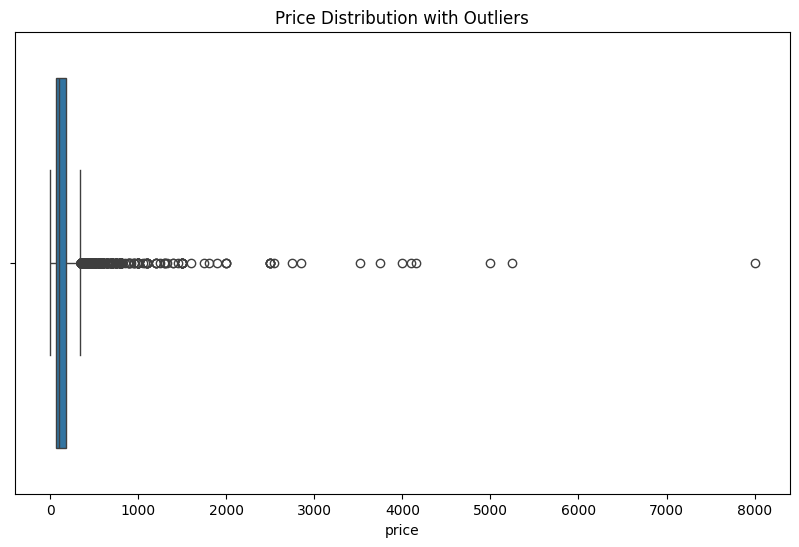

In [62]:
# Visualize price distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Price Distribution with Outliers')
plt.show()

In [63]:
# Remove price outliers beyond the 95th percentile
q95 = df['price'].quantile(0.95)
df = df[df['price'] <= q95]

In [64]:
# Check for remaining missing values
print(df.isnull().sum())

Unnamed: 0            0
listing_id            0
name                  0
host_id               0
host_name             0
neighbourhood_full    0
room_type             0
price                 0
number_of_reviews     0
reviews_per_month     0
availability_365      0
rating                0
number_of_stays       0
5_stars               0
listing_added         0
latitude              0
longitude             0
dtype: int64


In [65]:
# Check data types
print(df.dtypes)

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                 float64
number_of_reviews       int64
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object


In [66]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [67]:
# Display the shape of the cleaned dataset
print(f"Cleaned DataFrame Shape: {df.shape}")
# Display the first few rows of the cleaned data
print(df.head())

Cleaned DataFrame Shape: (9308, 17)
   Unnamed: 0  listing_id                                               name  \
0           0    13740704  Cozy,budget friendly, cable inc, private entra...   
1           1    22005115              Two floor apartment near Central Park   
2           2    21667615                  Beautiful 1BR in Brooklyn Heights   
3           3     6425850                          Spacious, charming studio   
4           4    22986519              Bedroom on the lively Lower East Side   

     host_id host_name          neighbourhood_full        room_type  price  \
0   20583125    Michel         Brooklyn, Flatlands     Private room   45.0   
1   82746113   Cecilia  Manhattan, Upper West Side  Entire home/apt  135.0   
2      78251    Leslie  Brooklyn, Brooklyn Heights  Entire home/apt  150.0   
3   32715865    Yelena  Manhattan, Upper West Side  Entire home/apt   86.0   
4  154262349    Brooke  Manhattan, Lower East Side     Private room  160.0   

   number_of_r

Data looks clean, lets check if variables are correlated

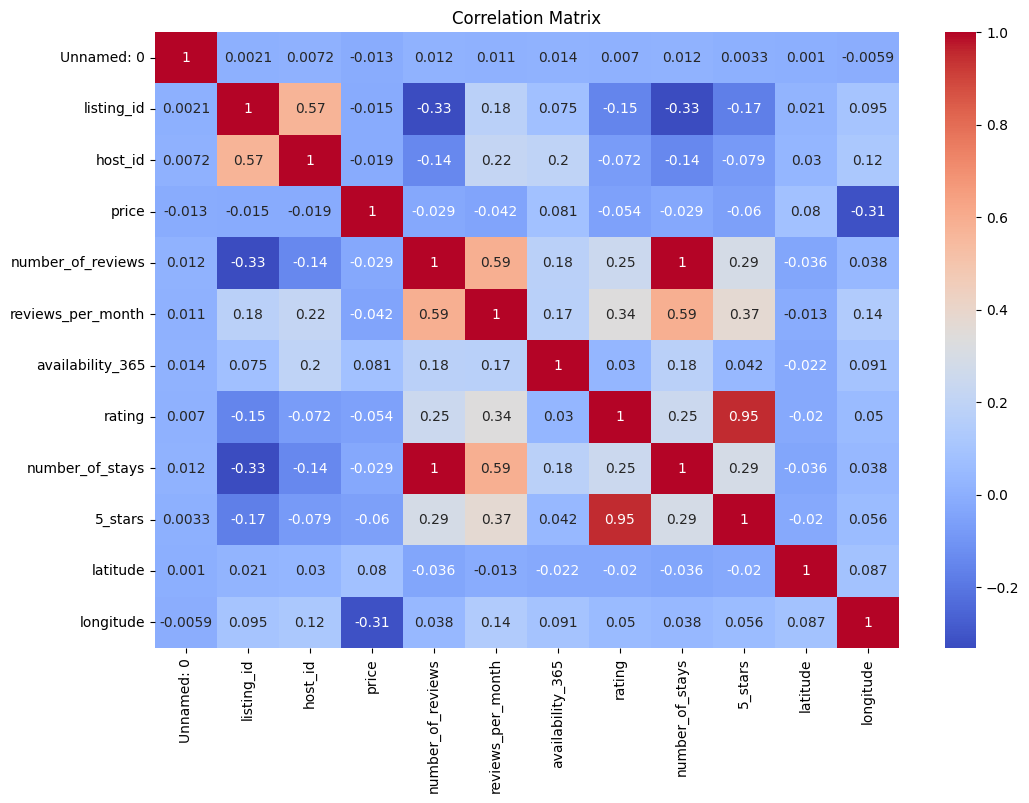

In [68]:
# Select numeric features for correlation matrix
numeric_features = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<!-- Ideally I would Consider Removing Weakly Correlated Features like
- X1 transaction date: Correlation with the target is very low (0.087).
- X2 house age: Correlation is also weak (-0.21) and may not contribute significantly.

Address Multicollinearity:

Between X3 distance to the nearest MRT station and X6 longitude, choose one. Since X3 has a stronger correlation with the target, you might consider keeping X3 and removing X6.

Since I dont have a lot of features here, I'm procedding without any changes. -->

In [69]:
# Select features and target
features = ['number_of_stays', 'rating', 'room_type', 'neighbourhood_full', 'availability_365', '5_stars']
X = df[features]
y = df['price']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['room_type', 'neighbourhood_full'], drop_first=True)


In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Problem 1.1. Supervised learning

In [71]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 2773.52
R2 Score: 0.48


Ideally r2 score has to be closer to 1 but the model isn't bad. To get more clarity lets plot actual vs predicted prices

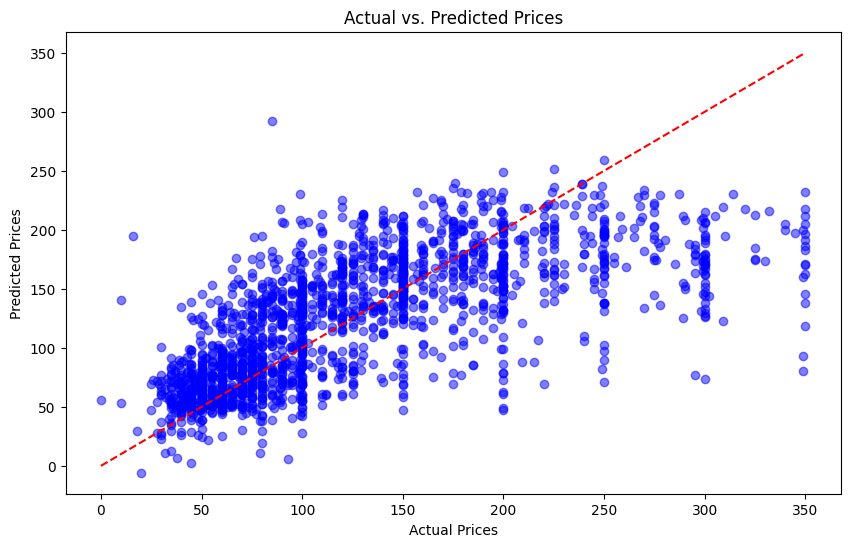

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

The scatter plot shows a positive correlation between actual and predicted prices, indicating that the model performs well overall.
Deviations from the diagonal line suggest some prediction errors, particularly for extreme values.

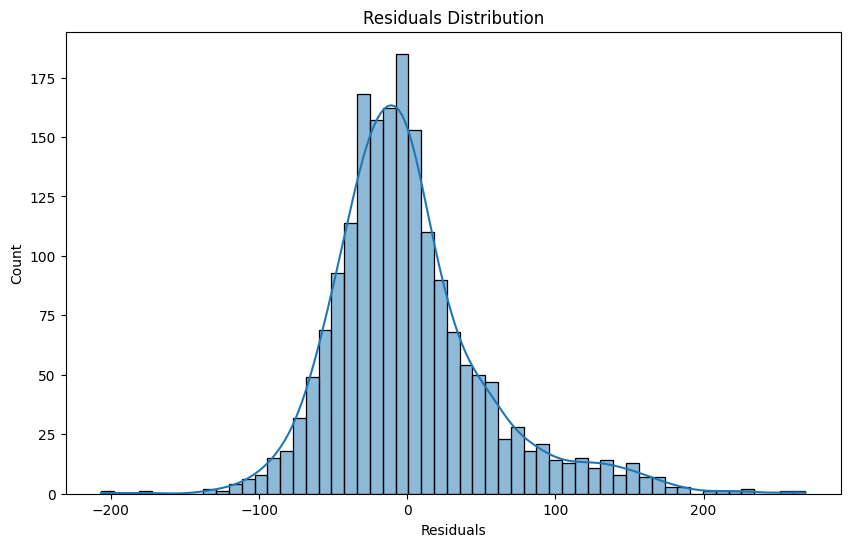

In [73]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

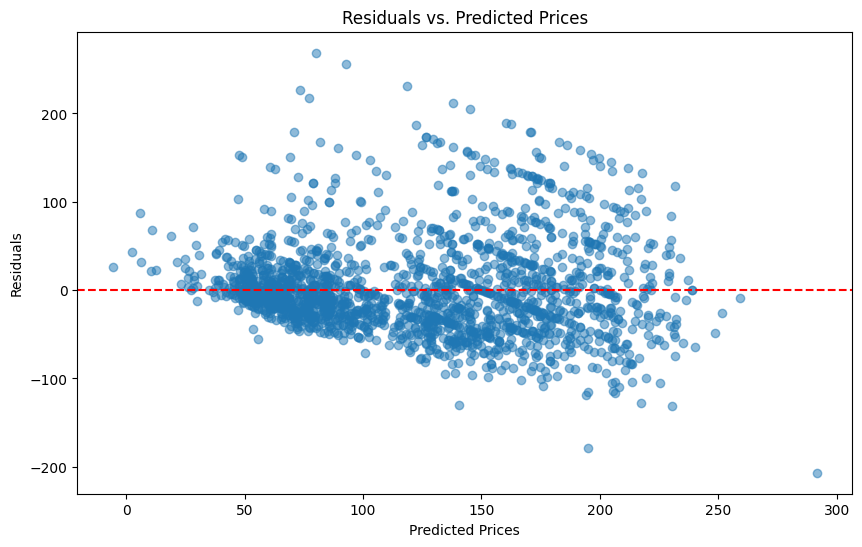

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Random Forest

In [75]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf:.2f}')
print(f'Random Forest R2 Score: {r2_rf:.2f}')

Random Forest MSE: 3031.99
Random Forest R2 Score: 0.43


Performs a little better than Linear Regression, lets plot to verify

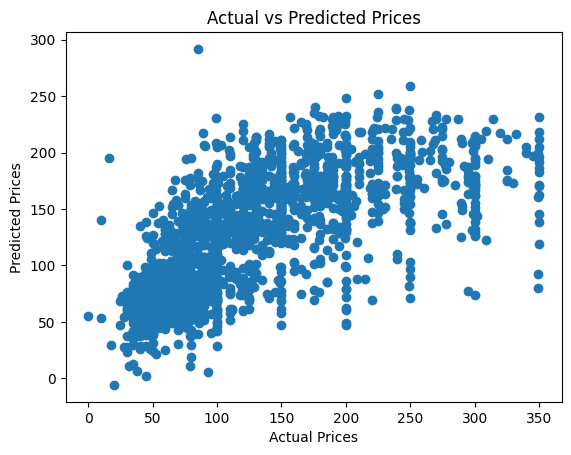

In [76]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

## Problem 1.2. Supervised Learning: Analysis

I tried using both linear regression and random forest models to predict Airbnb listing prices, and here's what I found. The linear regression model gave me a Mean Squared Error (MSE) of 2773.52 and an R-squared (R²) score of 0.48, so it explains about 48% of the price variability. Surprisingly, the random forest model performed slightly worse, with an MSE of 3031.99 and an R² of 0.43.

I think the linear regression model was effective because it highlighted key features like room type, location, and host ratings that influence price, and it's pretty straightforward to interpret. However, neither model was particularly great at predicting prices since they both left over half of the variance unexplained. This might be because important factors like amenities, seasonal demand, or dynamic pricing strategies weren't included in the data.

It's interesting because I expected the random forest to perform better due to its ability to capture complex patterns, but that wasn't the case. Maybe it needed more tuning or more relevant features to work with.

Overall, this exercise shows me that sometimes simpler models like linear regression can be just as effective as more complex ones, depending on the data. It also highlights the importance of good feature selection and understanding the problem domain, which complements the other tools we've studied in class.

# Problem 1.3. Unsupervised learning

I decided to apply K-means clustering to the Airbnb dataset to uncover hidden patterns. Here's how I approached it, inspired by the example guide

I selected the following features for clustering:

- Price: Central to distinguishing listings.
- Latitude and Longitude: Capture geographical information.
- Number of Reviews: Indicates popularity.
- Availability_365: Shows how often a listing is available.

I think these features will help identify clusters based on location, pricing, and demand.

In [77]:
print(df.head())


   Unnamed: 0  listing_id                                               name  \
0           0    13740704  Cozy,budget friendly, cable inc, private entra...   
1           1    22005115              Two floor apartment near Central Park   
2           2    21667615                  Beautiful 1BR in Brooklyn Heights   
3           3     6425850                          Spacious, charming studio   
4           4    22986519              Bedroom on the lively Lower East Side   

     host_id host_name          neighbourhood_full        room_type  price  \
0   20583125    Michel         Brooklyn, Flatlands     Private room   45.0   
1   82746113   Cecilia  Manhattan, Upper West Side  Entire home/apt  135.0   
2      78251    Leslie  Brooklyn, Brooklyn Heights  Entire home/apt  150.0   
3   32715865    Yelena  Manhattan, Upper West Side  Entire home/apt   86.0   
4  154262349    Brooke  Manhattan, Lower East Side     Private room  160.0   

   number_of_reviews  reviews_per_month  availabil

In [78]:
from sklearn.preprocessing import StandardScaler

# Select features and drop missing values
features = ['price', 'latitude', 'longitude', 'number_of_reviews', 'availability_365']
X = df[features].dropna()

# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values after conversion
X = X.dropna()

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

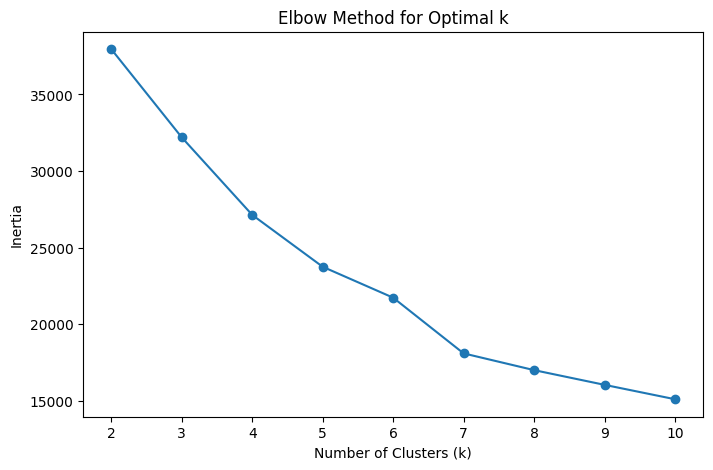

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)  # Testing k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


The elbow curve starts to flatten around k = 7, suggesting that 7 clusters might be optimal.



## silhouette analysis

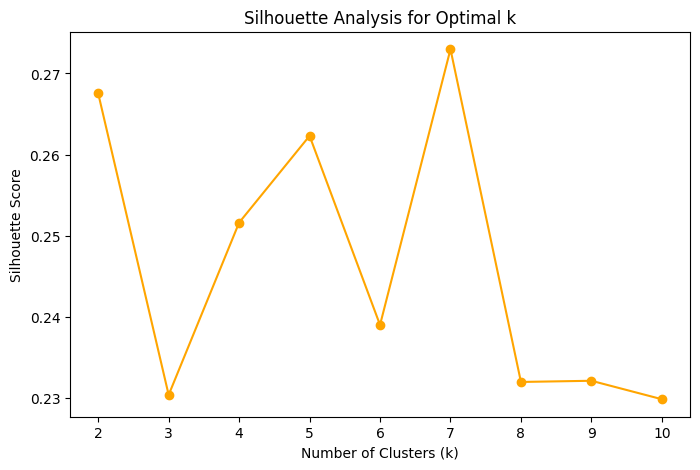

In [81]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

The silhouette scores peaked at k = 7

In [82]:
# Applying KMeans with k=7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Adding cluster labels to the dataframe
df_clustered = X.copy()
df_clustered['cluster'] = labels

In [83]:
cluster_centers = df_clustered.groupby('cluster').mean()
print(cluster_centers)

              price   latitude  longitude  number_of_reviews  availability_365
cluster                                                                       
0         89.253863  40.711088 -73.814184          23.518764        178.781457
1         87.596120  40.802954 -73.936340          14.119929         61.530276
2        224.172949  40.744807 -73.976492          13.652993        287.624169
3         87.078652  40.701163 -73.950126          20.716693        296.568218
4        208.800360  40.734158 -73.977991          11.529376         25.345923
5        118.278810  40.722284 -73.954269         166.159851        181.096654
6         83.364643  40.691622 -73.957239          11.487500         23.846786


Clusters 0, 1, 3, and 6 represent affordable listings but differ in location and availability.

Clusters 2 and 4 are high-priced listings in prime Manhattan areas, with cluster 4 being less available.

Cluster 5 stands out with moderate prices and very high reviews, indicating popular listings in desirable areas.

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

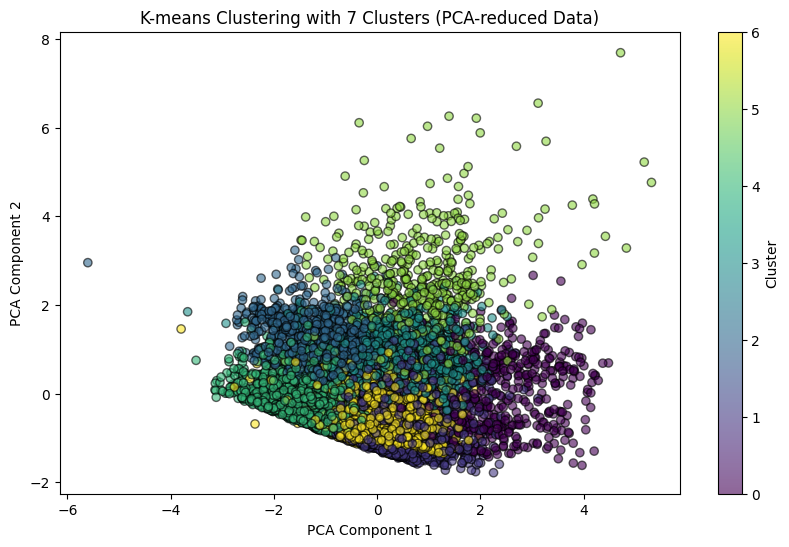

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with 7 Clusters (PCA-reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/747715453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')


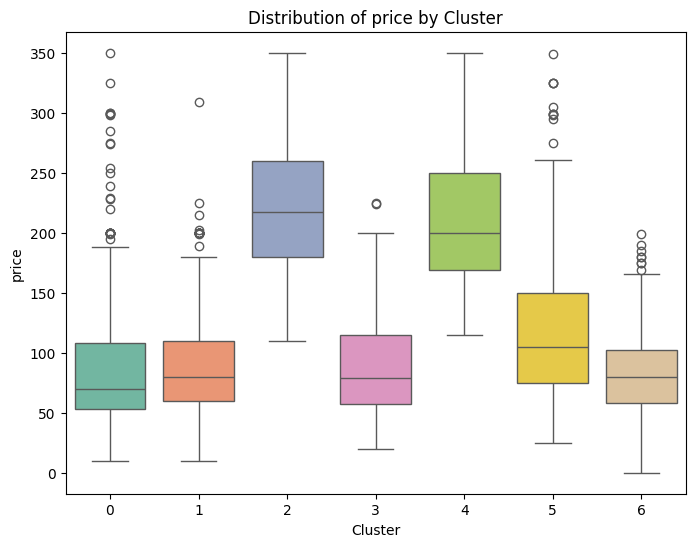

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/747715453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')


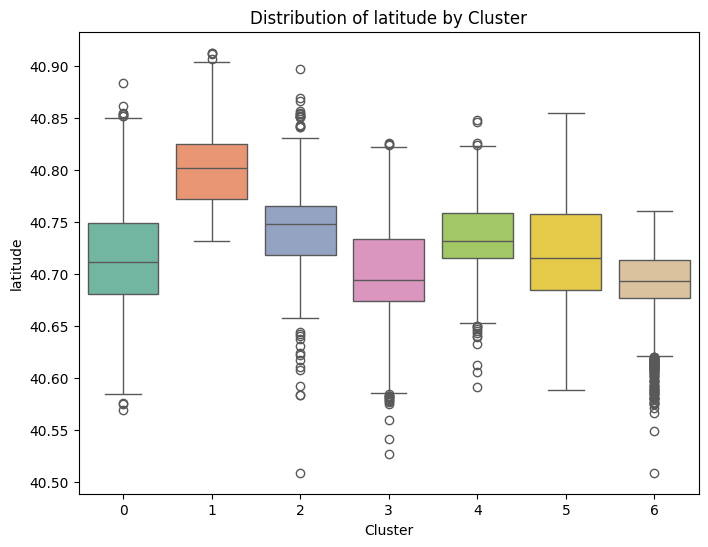

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/747715453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')


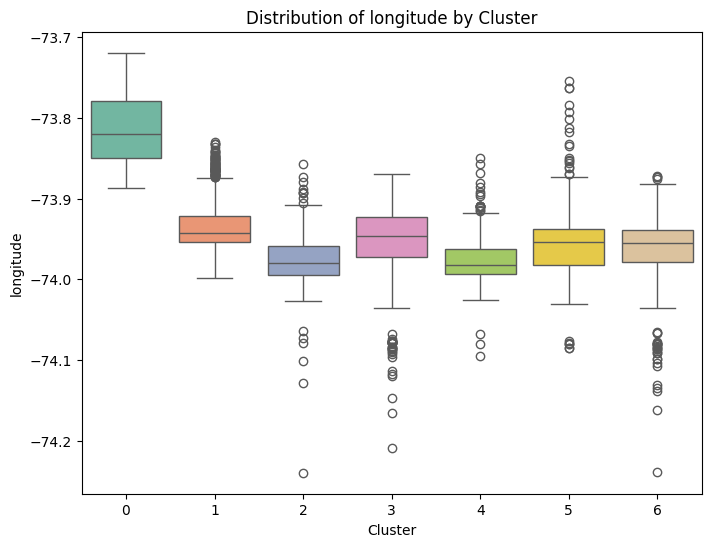

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/747715453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')


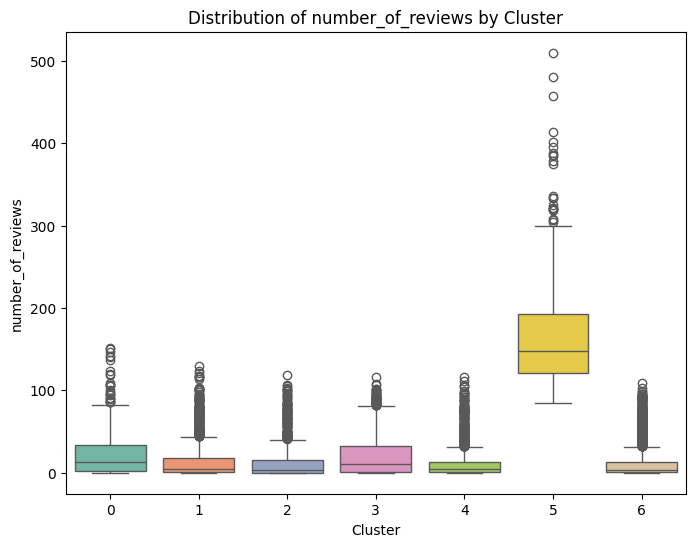

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/747715453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')


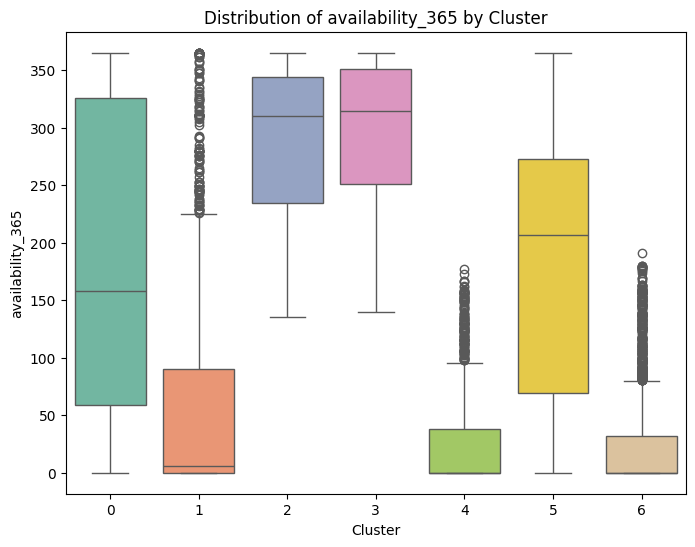

In [88]:
import seaborn as sns

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Problem 1.4. Unsupervised Learning Analysis

I applied K-means clustering with k = 7 to the Airbnb dataset, and I think it uncovered some interesting patterns. The clusters highlighted different groups of listings based on price, location, availability, and number of reviews.

What Worked Well:

The clustering revealed distinct market segments like budget-friendly options, luxury listings, and highly popular accommodations. Hosts can adjust their pricing and availability strategies based on their cluster, while guests can find listings that match their preferences better.

What Didn't Work So Well:

K-means assumes clusters are spherical and doesn't handle categorical variables like room type or amenities. I think including these factors could improve the clustering results.

I think this unsupervised approach adds value by finding hidden patterns without needing a target variable. It complements the supervised models we've studied by providing insights that can inform feature selection and enhance data understanding.
Overall, I think using K-means clustering provided valuable insights into the Airbnb listings and fits well with the other tools we've learned in class.

# Problem 2.1. Comparison

Reflecting on the analyses I've conducted, I think it's fascinating to see how they relate to various frameworks and tools we've discussed in class.

In my supervised learning analysis, I used linear regression to predict Airbnb prices based on features like location, ratings, and room type. This approach differs from inference testing or A/B testing, where we would experimentally manipulate variables to observe causal effects. For example, an Airbnb host might use A/B testing to determine if changing the listing title impacts booking rates. While my model predicts prices based on existing data, A/B testing could provide insights into how specific changes directly affect outcomes.


When I applied K-means clustering to the Airbnb dataset, I grouped listings into clusters based on similarities in price, location, and availability. This process is similar to theming in qualitative research, where we cluster interview insights to identify common patterns and themes. I think both methods aim to make sense of complex data by finding inherent structures, allowing for better understanding and decision-making without predefined labels.


Considering design justice and equity-centered design, my analysis could shed light on accessibility and fairness in the Airbnb market. For instance, clustering revealed areas with predominantly high-priced listings, which might exclude lower-income travelers or contribute to gentrification. I think incorporating these frameworks would encourage us to consider the social implications of Airbnb's operations and promote more inclusive practices that address the needs of diverse communities.


By applying futures thinking to my findings, we can explore how trends might evolve over time. For example, the rise of remote work could increase demand for long-term Airbnb stays in certain clusters. I think this approach helps anticipate potential shifts in the market, allowing hosts and policymakers to adapt strategies proactively, whether that's adjusting pricing models or implementing regulations to balance community interests.

# Problem 3.1

I did the Random Forest Regression for price prediction on problem 1.1 after linear regression model.

## Classification with Logistic Regression
I wanted to classify Airbnb listings as "High Price" or "Low Price" using logistic regression. Since the dataset didn't have a predefined target variable for this, I created one based on the median price.

In [40]:
# print(df.head())

In [41]:
# Calculate median price
median_price = df['price'].median()

# Create binary target variable
df['price_category'] = df['price'].apply(lambda x: 1 if x >= median_price else 0)

# Select features
features = ['number_of_reviews', 'rating', 'availability_365', 'latitude', 'longitude']

# Handle missing values
X = df[features].dropna()
y = df['price_category'].loc[X.index]

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.66
Confusion Matrix:
[[477 396]
 [239 750]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       873
           1       0.65      0.76      0.70       989

    accuracy                           0.66      1862
   macro avg       0.66      0.65      0.65      1862
weighted avg       0.66      0.66      0.65      1862



In [45]:
# Feature coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
})
print(coefficients)

             Feature  Coefficient
0  number_of_reviews    -0.026831
1             rating     0.008296
2   availability_365     0.153353
3           latitude     0.177000
4          longitude    -0.775351


# Problem 3.2: Results Visualization

In [47]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 7.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 5.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Find it confusing to use streamlit here in vs code, I'll spend more time figuring it out later!
Thanks for reading~